In [1]:
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt

import h5py
import tables

In [2]:
DATA_DIR = "/scratch9/mkron/data/training_data/second_dataset"

# gives us all files in the directory
file_list=[]
for (dirpath, dirnames, filenames) in os.walk(DATA_DIR):
    file_list.extend(filenames)
    break
print file_list

['File_5.h5', 'File_0.h5', 'File_1.h5', 'File_4.h5', 'File_3.h5', 'File_2.h5']


In [18]:
#make an np.array of the features of the X files, to not loop all the time
energy = []
true_energy = []
ClassLabel = []
StartingLabel = []
CoincidenceLabel = []
UpDownLabel = []
for current_file in file_list:
        try:
            file = h5py.File(os.path.join(DATA_DIR, current_file), "r")
        except Exception:
            print "File {} failed".format(current_file) 
            break
        energy.append(file["reco_vals"]["depositedE"])
        true_energy.append(file["reco_vals"]["energyFirstParticle"])
        ClassLabel.append(file["reco_vals"]["ClassificationLabel"])
        StartingLabel.append(file["reco_vals"]["StartingLabel"])
        CoincidenceLabel.append(file["reco_vals"]["CoincidenceLabel"])
        UpDownLabel.append(file["reco_vals"]["UpDownLabel"])
        file.close()
energy = np.array([item for sublist in energy for item in sublist])
true_energy = np.array([item for sublist in true_energy for item in sublist])
ClassLabel = np.array([item for sublist in ClassLabel for item in sublist])
StartingLabel = np.array([item for sublist in StartingLabel for item in sublist])
CoincidenceLabel = np.array([item for sublist in CoincidenceLabel for item in sublist])
UpDownLabel = np.array([item for sublist in UpDownLabel for item in sublist])

#### Size of the Dataset

In [70]:
total = len(energy)
print "We use {} HDF-Files".format(len(file_list))
print "\n"
print "Total number of events: {}".format(total)
print "events in one HDF: {}".format(total/len(file_list))

We use 6 HDF-Files


Total number of events: 960133
events in one HDF: 160022


#### Composition according to Purpose  (Training, Validation and Test Set)

In [71]:
train_frac = 7.5
val_frac = 2.5
test_frac = 1.
sum_frac = train_frac + val_frac + test_frac

In [72]:
print "Number of events in the TRAINING SET: {}".format((train_frac/sum_frac)*total)
print "Number of events in the VALIDATION SET: {}".format((val_frac/sum_frac)*total)
print "Number of events in the TEST SET: {}".format((test_frac/sum_frac)*total)
print "Percentage of TRAINING SET: {}".format((train_frac/sum_frac)*100)
print "Percentage of VALIDATION SET: {}".format((val_frac/sum_frac)*100)
print "Percentage of TEST SET: {}".format((test_frac/sum_frac)*100)

Number of events in the TRAINING SET: 654636.136364
Number of events in the VALIDATION SET: 218212.045455
Number of events in the TEST SET: 87284.8181818
Percentage of TRAINING SET: 68.1818181818
Percentage of VALIDATION SET: 22.7272727273
Percentage of TEST SET: 9.09090909091


## Energy Distribution

###### deposited Energy

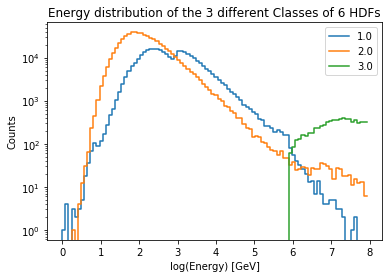

In [13]:
binnumber = 100
ibins = np.linspace(0,8,binnumber)
for i in [1.0, 2.0, 3.0]:
    vals, bins = np.histogram(np.log10(energy[ClassLabel == i]), bins=ibins)
    plt.semilogy(bins[:-1], vals, drawstyle='steps-pre', label=i)

plt.legend(loc='best')
plt.title("Energy distribution of the 3 different Classes of {} HDFs".format(len(file_list)))
plt.xlabel('log(Energy) [GeV]')
plt.ylabel('Counts')
plt.show()

### hit DOMs Histogramm

In [16]:
hitDOM = []

file = h5py.File(os.path.join(DATA_DIR, "File_1.h5"), "r")
for i in xrange(len(file["charge"])):
    hitDOM.append(np.count_nonzero(file["charge"][i]))
hitDOM = np.array(hitDOM)

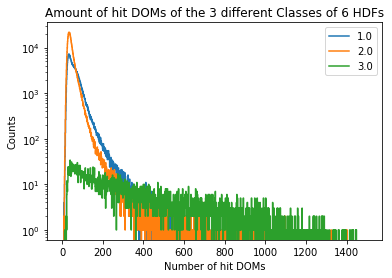

In [33]:
binnumber = 1500
ibins = np.linspace(0,binnumber,binnumber)
for i in [1.0, 2.0, 3.0]:
    vals, bins = np.histogram(hitDOM[ClassLabel == i], bins=ibins)
    plt.semilogy(bins[:-1], vals, drawstyle='steps-pre', label=i)

plt.legend(loc='best')
plt.title("Amount of hit DOMs of the 3 different Classes of {} HDFs".format(len(file_list)))
plt.xlabel('Number of hit DOMs')
plt.ylabel('Counts')
plt.show()

## Distribution of Labels

In [62]:
def barchart(classes, values, title, ylabel, xlabel):
    fig, ax = plt.subplots()
    y_pos = np.arange(len(classes))
    couleur = ['#0000FF', '#0099FF', '#000000']
    total = sum(values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    for i in xrange(len(classes)):
        plt.text(y_pos[i], values[i]/2, '{:.2f}'.format(1.*values[i]/total), horizontalalignment="center",\
                 color="white")
                 #color="white" if values[i]/total < 0.25 else "black")
    plt.bar(y_pos, values, align='center', alpha=1.0, color=couleur)
    ax.set_xticks(range(len(classes)))
    ax.set_xticklabels(classes, rotation='25')
    plt.show()

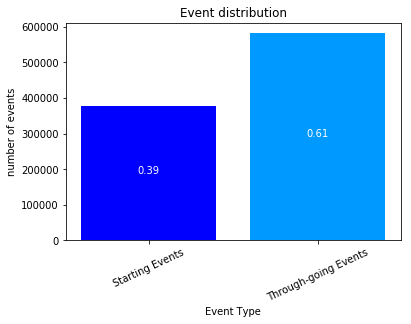

In [63]:
barchart(('Starting Events', 'Through-going Events'),\
         [StartingLabel.tolist().count(1.), StartingLabel.tolist().count(0)],\
         'Event distribution', 'number of events', "Event Type")



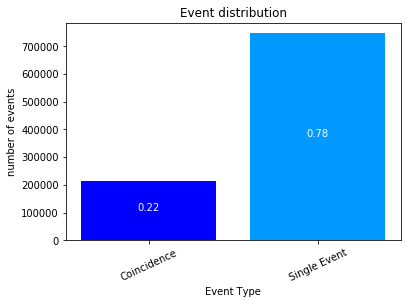

In [64]:
barchart(('Coincidence', 'Single Event'),\
         [CoincidenceLabel.tolist().count(1.), CoincidenceLabel.tolist().count(0)],\
         'Event distribution', 'number of events', "Event Type")

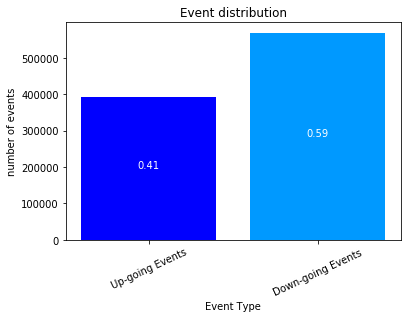

In [65]:
barchart(('Up-going Events', 'Down-going Events'),\
         [UpDownLabel.tolist().count(1.), UpDownLabel.tolist().count(0)],\
         'Event distribution', 'number of events', "Event Type")

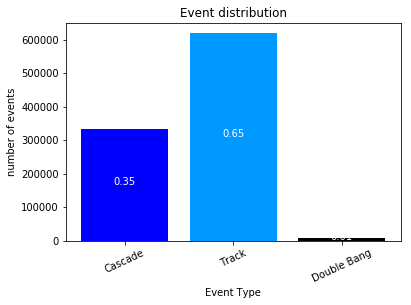

In [66]:
barchart(('Cascade', 'Track', 'Double Bang'),\
         [ClassLabel.tolist().count(1.), ClassLabel.tolist().count(2), ClassLabel.tolist().count(3)],\
         'Event distribution', 'number of events', "Event Type")

## Input Features

### Investigation on Single Event basis

In [89]:
file = h5py.File(os.path.join(DATA_DIR, 'File_0.h5'), "r")
#event_number = 3 #Track
event_number = 18 #Cascade
#file.keys()

###### Information on the Event

In [90]:
type = file["reco_vals"][event_number][3]
energy = file["reco_vals"][event_number][0]
print "Event Type: {}".format(type)
print "Energy: {} [GeV]".format(energy)

Event Type: 1.0
Energy: 141215.086507 [GeV]


#### first time

In [91]:
# gets a list with all values of each DOM for one event 
first_time_doms = []
for x in np.nditer(file["time"][event_number]):
    if x != 0:
        first_time_doms.append(x) 

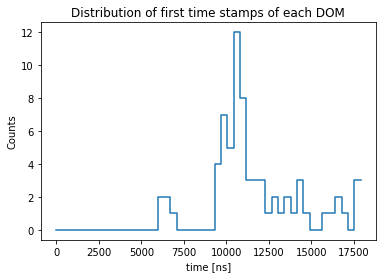

In [92]:
binnumber = 50
ibins = np.linspace(0,np.max(first_time_doms),binnumber)
vals, bins = np.histogram(first_time_doms, bins=ibins)
plt.title("Distribution of first time stamps of each DOM")
plt.ylabel("Counts")
plt.xlabel("time [ns]")
plt.plot(bins[:-1], vals , drawstyle='steps-pre')

#### time at 20% of charge

In [42]:
# gets a list with all values of each DOM for one event 
doms_list = []
for x in np.nditer(file["time_20pct"][event_number]):
    if x != 0:
        doms_list.append(x)

In [43]:
print file["reco_vals"][event_number]

(359.5835103446849, -14.0, 2.0, 732.3004290419833, 1.0, 0.0, 0.0)


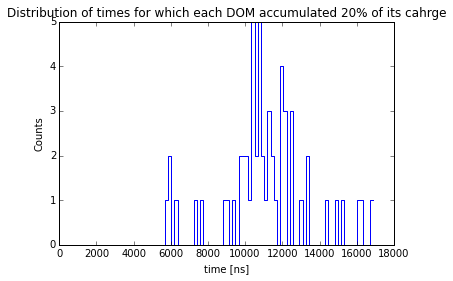

In [44]:
binnumber = 100
ibins = np.linspace(0,np.max(doms_list),binnumber)
vals, bins = np.histogram(doms_list, bins=ibins)
plt.title("Distribution of times for which each DOM accumulated 20% of its cahrge")
plt.ylabel("Counts")
plt.xlabel("time [ns]")
plt.plot(bins[:-1], vals , drawstyle='steps-pre')

# Waveform of single DOMS

In [ ]:
# Single DOM, Measured charge over time

# needed Information, not saved in the HDF-Files, I3-Files are neccesary

In [29]:
file = h5py.File(os.path.join(DATA_DIR, "File_1.h5"), "r")
file.keys()

[u'av_time_charges',
 u'charge',
 u'charge_100ns',
 u'charge_500ns',
 u'first_charge',
 u'num_pulses',
 u'reco_vals',
 u'time',
 u'time_20pct',
 u'time_50pct',
 u'time_kurtosis',
 u'time_moment_2',
 u'time_quartercharge',
 u'time_spread']